In [28]:
# 버전
# python version : 3.7.13
# matplotlib version : 3.5.2
# openCV version : 4.6.0
# pytesseract version : 0.3.9
# googletrans : '3.1.0-alpha'
# PIL.Image : 9.2.0


# 버전 확인 코드
# openCV: cv2.__version__
# pytesseract :
# import pkg_resources
# pkg_resources.working_set.by_key['pytesseract'].version
# tf.__version__
# PIL.Image.__version__


In [29]:
# 필요한 패키지 임포트
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 이미지에서 텍스트 추출
import pytesseract
import os
import googletrans
from PIL import Image, ImageFont, ImageDraw
import re

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' #테서랙트 설치된 경로


In [30]:
# 전처리 함수
def preprocessing(org_image):

    # 그레이 스케일 이미지
    gray_img = cv2.cvtColor(org_image, cv2.COLOR_BGR2GRAY)

    # grayscale -> binary
    binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    return binary_img

In [31]:
# 번역 함수
def translate_result(string, lang='ko'):  # 기본적으로 한글로 번역

    translator = googletrans.Translator()

    result = translator.translate(string, dest=lang) # result는 번역 객체
    return result.text # 번역된 결과 text만 반환


In [32]:
# 이미지에 한글 출력하는 함수
# img는 cv2로 읽은 파일, string은 번역한 한글, x, y는 좌하단 좌표, fontsize는 폰트 크기, fontcolor는 폰트 컬러

def textImage(img, string, x, y, fontsize, fontcolor=(0,0,0)):
    
    pil_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # CV2를 RGB파일로
    pil_image = Image.fromarray(pil_image) # PIL이미지로 변환

    # 그리기 준비, 폰트 설정
    fontpath = './font/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
    font = ImageFont.truetype(fontpath, fontsize) # 폰트 종류, 크기 지정. 폰트 객체 생성
    draw = ImageDraw.Draw(pil_image) # 그리기 객체 생성

    draw.text((x, y), str(string), fontcolor, font=font) # 텍스트 그리기

    return pil_image

In [33]:
def cleanSentence(st):
    st = re.findall('[a-zA-Z0-9.,!~;:]+', st)
    return st

현재 i:  해리포터 책의 엄청난 인기는 독자들이 삶에 가져오는 심리적 문제에 대해 느끼는 깊은 반향을 지적합니다. 세 가지 발달 문제가 중심 주제를 제공합니다. 삶의 어려움에 대한 자기애적 해결책의 거부 또는 승인; 그리고 성인의 힘으로 성장하면서 침략과 거세 환상. 이러한 발달 문제는 청소년기에 특히 심각하지만 더 일찍 시작하여 평생 동안 계속해서 수정되어 청소년기에 초점을 맞춘 것처럼 보이지만 광범위한 연령대의 독자에게 이 책이 호소력을 발휘합니다. 이러한 발달 주제는 해리 포터 책을 더 잘 이해하기 위해 탐구되는 반면, 역으로 책은 이러한 주제를 더 잘 이해하기 위해 탐색됩니다.
현재 i:  먼저, 경고: 이 모든 것이 어떻게 끝나는지 알려 드리겠습니다. 알고 싶지 않다면 지금 중지하십시오.
현재 i:  T는 보수적인 종교적 양육을 거부했지만 "영적" 의미를 계속 추구하는 친구로부터 해리 포터에 대해 처음 들었습니다. 내가 마지막 권을 끝내고 얼마 지나지 않아 점원은 나에게 그것이 어떻게 끝났는지 "평안한지" 물었습니다. 해리 포터와의 인연이 영성에 의해 끊어진 것은 우연이 아니라고 생각합니다. 사람들은 이 시리즈를 엄청나게 사랑하고 걱정합니다. 판매가 너무 커서 첫 번째 권 이후 New York Times는 베스트셀러 목록 방식을 변경하여 정규
현재 i:  교육 및 감독 분석가, 애리조나 정신 분석 연구 센터 및 뉴욕 프로이트 학회에서 해리 포터 책을 삭제했습니다.
현재 i:  이 책의 이전 버전 논문은 Grand Rounds에서 발표되었습니다. 애리조나 대학교 정신의학과(2008년 2월 6일), 사우스웨스트 정신분석학회의 투손(2008년 4월 24일) 및 피닉스(2008년 9월 13일). '저자는 도움이 되는 의견을 주신 Sydney Arkowitz, Julia Bach, Donna Bender, Pamela Hays 및 Joanna Lampe에게 감사드립니다.
최종 출력:  — i)

= John Rosegrant XX/K

죽음의 성물: 해리 포

Text(0.5, 1.0, 'input text')

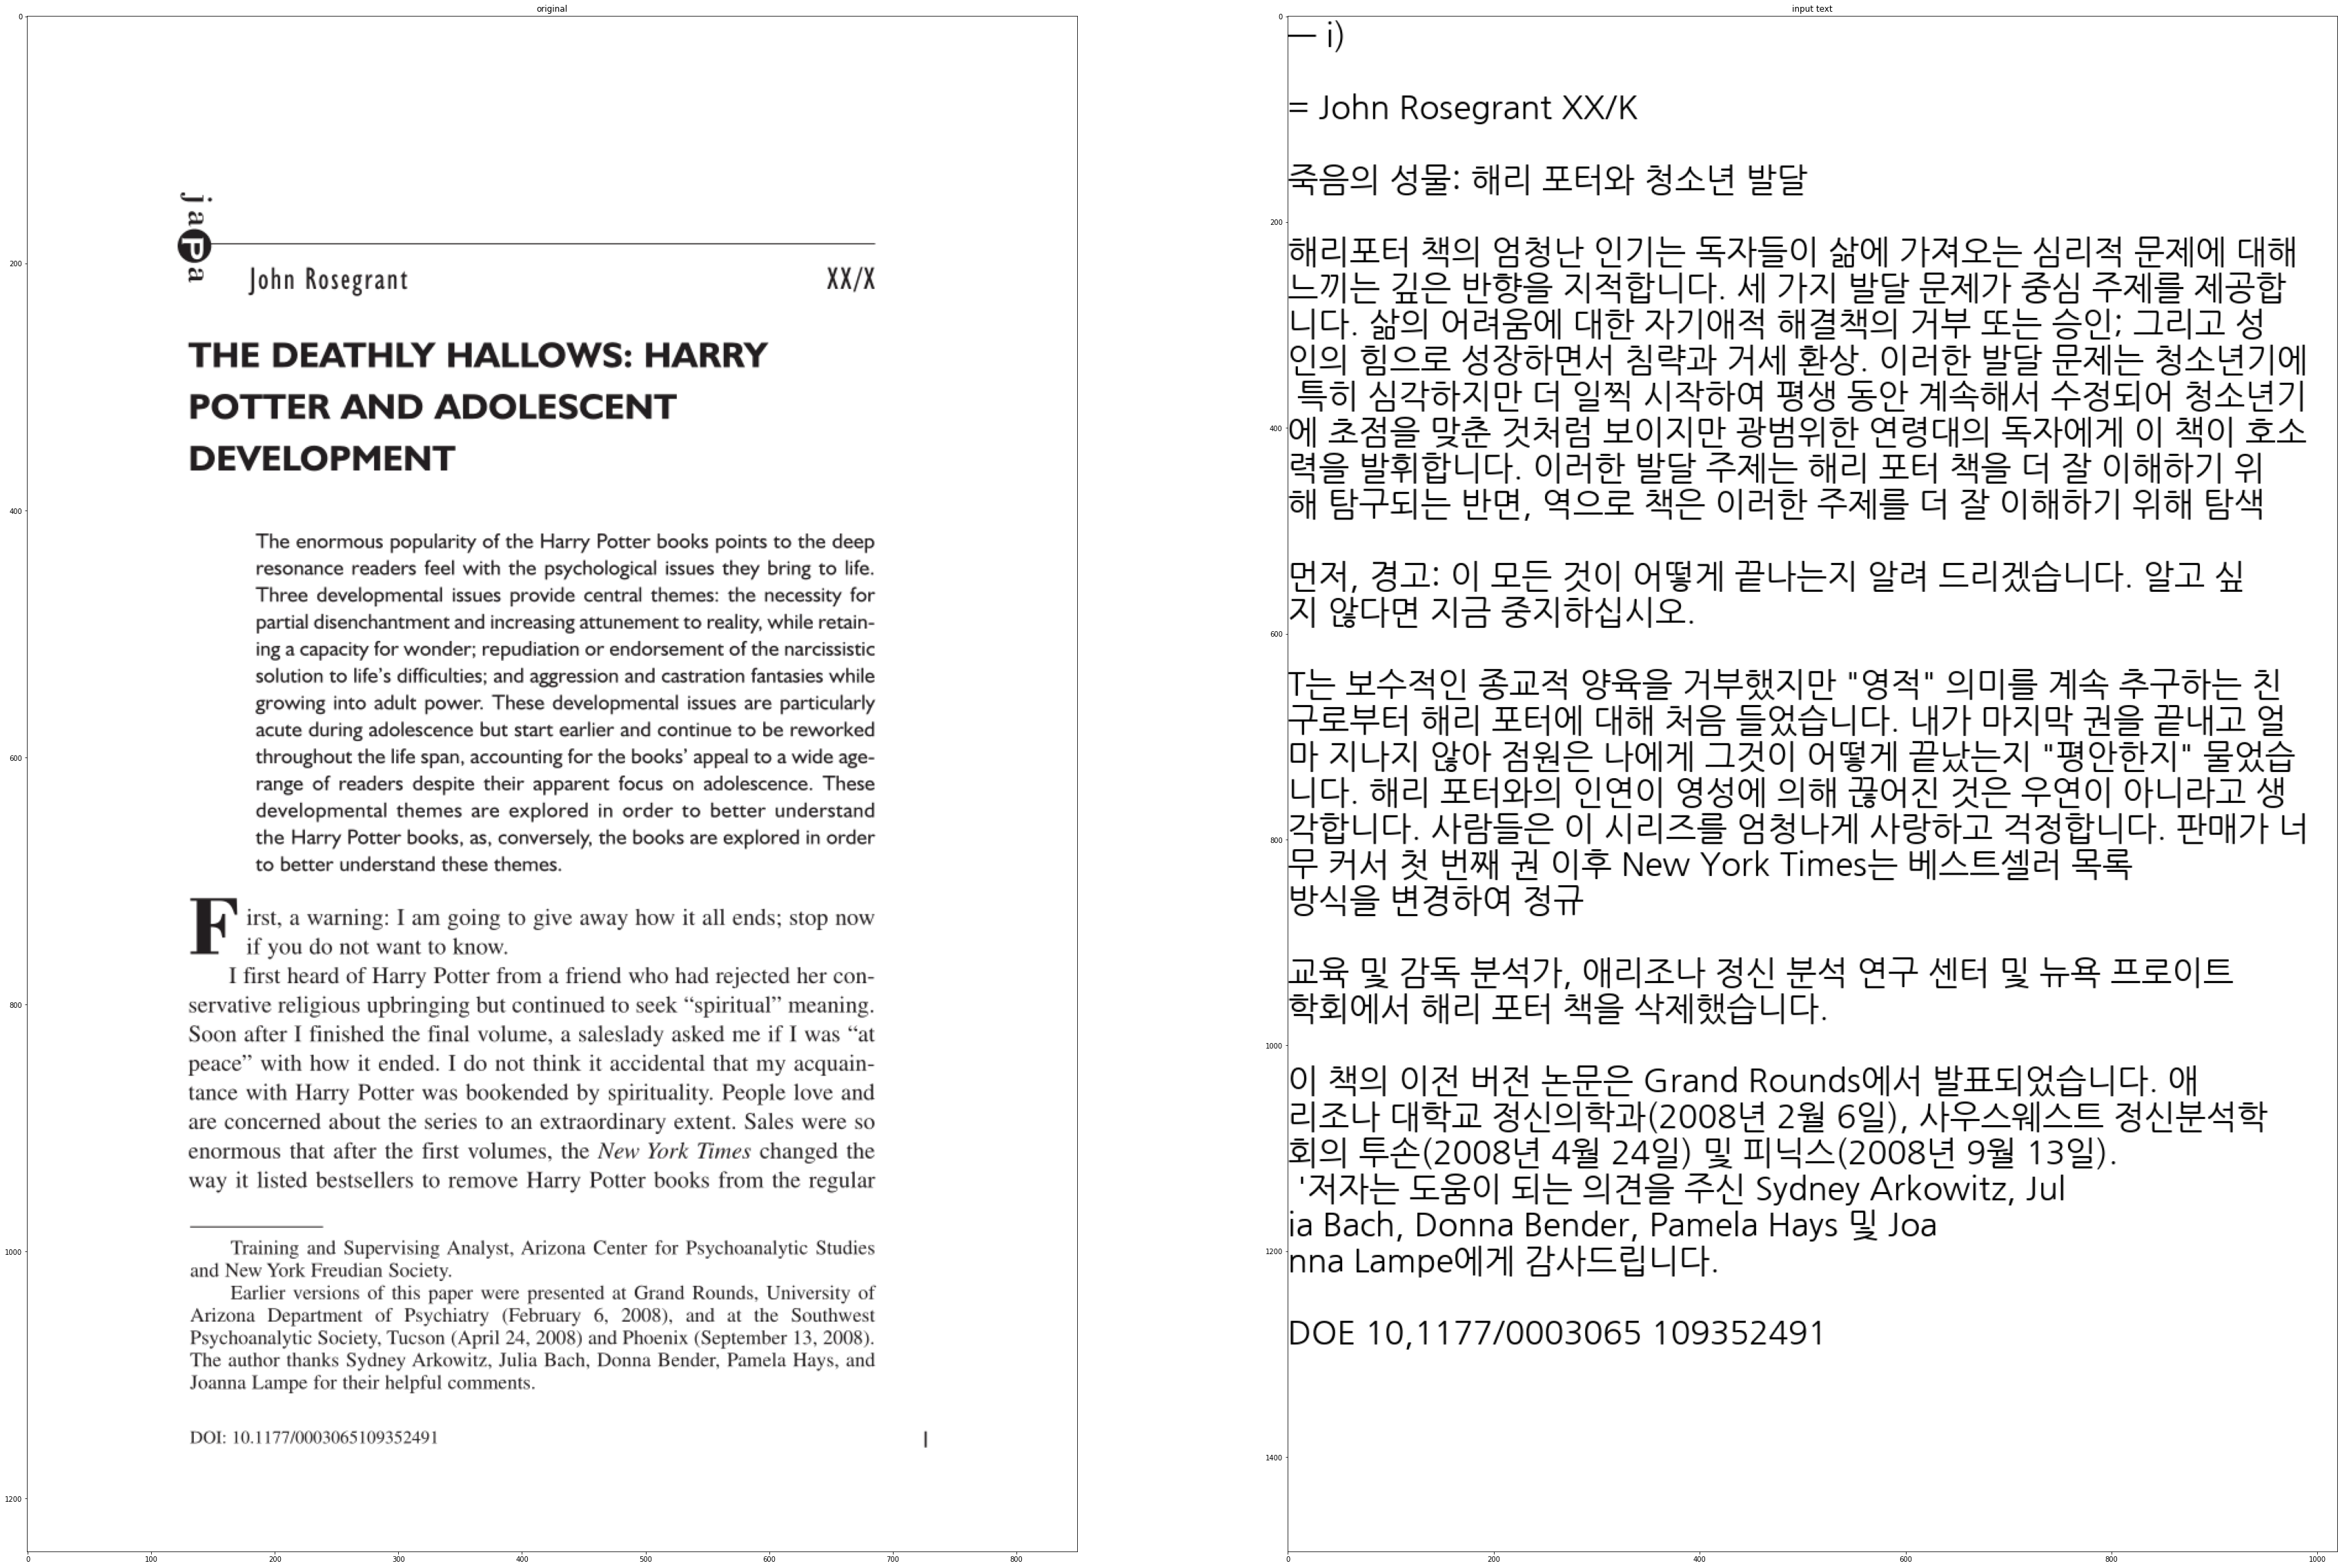

In [37]:
# 이미지를 불러오고 텍스트를 찾아서 지우고 번역한 텍스트를 삽입


imgPath = './harry.png'
# gute.jpg도 괜찮게 나옴.

divide_size = 31 # 가로 공간을 divide_size로 나눔.

large = cv2.imread(imgPath) #이미지 불러오기
## news1은 부분 인식이 안 됨
## ye.jpg는 일부분만 인식
rgb = cv2.resize(large, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC) # dpi 올리기
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY) # BGR->GRAY
kernel = np.ones((1, 1), np.uint8)
img = cv2.dilate(small, kernel, iterations=1) # 팽창
img = cv2.erode(img, kernel, iterations=1) #침식
# 가우시안 블러 적용
bw = cv2.threshold(cv2.GaussianBlur(img, (5, 5), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# 검출
contours, hierarchy = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cntours: 검출된 외곽선 좌표. numpy.ndarray로 구성된 리스트. len(contours)=전체 외곽선 개수(N). contours[i].shape=(K, 1, 2). contours[i].dtype=numpy.int32.
# hierarchy: 외곽선 계층 정보. numpy.ndarray. shape=(1, N, 4). dtype=numpy.int32. hierarchy[0, i, 0] ~ hierarchy[0, i, 3]이 순서대로 next, prev, child, parent 외곽선 인덱스를 가리킴. 해당 외곽선이 없으면 -1.
mask = np.zeros(bw.shape, dtype=np.uint8) # 기본 마스크는 bgr, 전부 0이다.

# 찾은 글자 박스 하나씩 돌면서
for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx]) # 박스 하나의 x, y, w, h
    mask[y:y+h, x:x+w] = 0 # 원본 이미지에서 텍스트를 발견한 부분을 마스크에서 0으로 만듦
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
                # mask에 contours를 그린다
                # idx = 포인트 어레이 인덱스
                # 컨투어 색상은 (255,255,255)
                # 컨투어 라인 두께 : -1

    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h) 
    # mask 내 0이 아닌 부분 검출한 후 비율을 계산해서 0.45보다 크면


    if r > 0.45 and w > 4 and h > 4: # 0.45보다 크고 박스 크기가 일정 이상이라면.

        # 글자 있는 부분만 잘라서 전처리
        img = preprocessing(rgb[y:y+h, x:x+w])
        
        # 글자 검출
        txt = pytesseract.image_to_string(img,
                        lang='ENG',config='--psm 4 -c preserve_interword_spaces=1')
        
        if txt!='': 
            # \n을 ''로 변경
            txt = txt.replace('\n\n', '>')
            txt = txt.replace('\n', ' ') # 이렇게 하면 \n\n도 걸림. \n\n을 다른 걸로 변경하고 나서 해야 함
            result = translate_result(string=txt)    #번역
            #print('번역 결과: ', result) # 번역 잘 됨            
            
            
            # 쪼개기 ---(\n\n)단위로 쪼개기
            result = result.split('>') # result는 list형태 
            # print('쪼개진 result: ', result)
            # 다시 원래 형태대로 되돌림
            tmp = ''
            for i in result:                
                if len(i)>divide_size: # 한 문장 (i)가 특정 길이 이상이라면
                    print('현재 i: ', i)
                    ## 단어 단위로 쪼개면 더 예쁜데... 우선 공백단위로 자르고 각 단어의 길이 보면서
                    # 총 단어의 길이가 48이하라면 삽입(뒤에 \n 붙여서). 그리고 삽입한 애들 다음부터 봄.
                    # 그렇게 끝까지 가면 하나의 i가 끝난 것. \n\n붙이기?

                    addValue = 8
                    splitted=''
                    start = 0; end=40 # 40자까지
                    while len(splitted)<=len(i):
                        splitted += i[start:end]+'\n'
                        start = end; end=end+40
                    tmp += splitted+'\n' # 적당한 크기로 쪼개진 문장이 tmp에 담김
                    #print('splitted: ', splitted)
                else:
                    tmp += i+'\n\n' # \n\n으로 다시 붙임
            print('최종 출력: ', tmp)
            
            # 추가적으로 너무 길기 때문에 .단위로 분리
            #result = result.replace('. ', '\n')

            # print('번역 결과: ', result)
### 그냥 싹 번역하고 글자 단위로 쪼개자!!!


        ###  문제는 한 문단으로 번역을 돌린 후 원래의 \n로 다시 분리해서 넣어야 함.
        # 한 문단으로 합친 후 번역 돌릴 때, 번역에 영향을 미치지 않는 문자를 찾자

        # 글자 있던 부분의 좌측 하단 색상을 받아와 글자 검출된 박스 전체를 칠함.
        b,g,r = rgb[y,x] # 상자 좌측하단 좌표의 색을 받아옴.
        cv2.drawContours(rgb, contours, idx, (float(b),float(g),float(r)), -1)
       
        # 번역 결과 result를 이미지에 그리기
        img = textImage(rgb, string=tmp, x=x, y=y, fontsize=(rgb.shape[1])//divide_size, fontcolor=(0,0,0))
        
# 출력 이미지 크기 설정
plt.figure(figsize=(60,70))

# 원본 이미지
ori_img = cv2.imread(imgPath)
ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(ori_img)
plt.title('original')

# 번역된 글자가 삽입된 이미지 출력
plt.subplot(1,2,2)
plt.imshow(img)
plt.title('input text')
